In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

<h5>Set seed for reproducibility</h5>

In [4]:
np.random.seed(150)
random.seed(150)

<h4>Constants</h4>

In [5]:
num_records = 1000
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 9, 24)
room_type = ['Single', 'Double', 'Suite', 'Family']
statuses = ['Checked in', 'Checked out', 'Cancelled', 'No show']


<h4>Helper function to generate random dates</h4>

In [6]:
def random_date(start, end):
    return start + timedelta(days = random.randint(0, (end - start).days))

#Generate data
data = {
    "Booking ID": range(1, num_records +1),
    "Check-in Date": [random_date(start_date, end_date) for _ in range(num_records)],
    "Customer ID": [random.randint(1000, 9999) for _ in range(num_records)],
    "Room Type": [random.choice(room_type) for _ in range(num_records)],
    "Booking Status": [random.choice(statuses) for _ in range (num_records)],
    "Total Amount": [round(random.uniform(50, 500), 2) for _ in range(num_records)]
}

# Create a Dataframe
df = pd.DataFrame(data)

# Calculate check-out date based on check-in date and random stay in duration
df['Check-out Date'] = df['Check-in Date'] + pd.to_timedelta(np.random.randint(1, 15, size=num_records),unit='D')

<h4>Display the first few rows of the DataFrame</h4>

In [7]:
df.head()

,Booking ID,Check-in Date,Customer ID,Room Type,Booking Status,Total Amount,Check-out Date
0,1,2024-11-30,2320,Suite,Cancelled,473.16,2024-12-05
1,2,2025-02-12,6278,Double,No show,161.34,2025-02-23
2,3,2024-07-11,6282,Double,Cancelled,66.90,2024-07-23
3,4,2024-08-20,3508,Family,Checked out,428.60,2024-08-30
4,5,2024-11-07,7849,Suite,Checked out,337.17,2024-11-08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Booking ID      1000 non-null   int64         
 1   Check-in Date   1000 non-null   datetime64[ns]
 2   Customer ID     1000 non-null   int64         
 3   Room Type       1000 non-null   object        
 4   Booking Status  1000 non-null   object        
 5   Total Amount    1000 non-null   float64       
 6   Check-out Date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 54.8+ KB


<h4>Handling missing values</h4>
<h5>Assuming we want to drop row with any missing values</h5>

In [9]:
new_df = df.dropna()

#handling duplicates
#drop any duplicate row
new_df = new_df.drop_duplicates()



In [10]:
new_df ['Check-in Date'] = pd.to_datetime(new_df['Check-in Date'])
new_df ['Check-out Date'] = pd.to_datetime(new_df['Check-out Date'])

In [11]:
new_df.head()

,Booking ID,Check-in Date,Customer ID,Room Type,Booking Status,Total Amount,Check-out Date
0,1,2024-11-30,2320,Suite,Cancelled,473.16,2024-12-05
1,2,2025-02-12,6278,Double,No show,161.34,2025-02-23
2,3,2024-07-11,6282,Double,Cancelled,66.90,2024-07-23
3,4,2024-08-20,3508,Family,Checked out,428.60,2024-08-30
4,5,2024-11-07,7849,Suite,Checked out,337.17,2024-11-08


In [12]:
new_df.describe()

,Booking ID,Check-in Date,Customer ID,Total Amount,Check-out Date
count,1000.000000,1000,1000.000000,1000.000000,1000
mean,500.500000,2024-11-09 18:15:50.400000,5475.140000,271.923360,2024-11-17 10:26:24
min,1.000000,2024-01-01 00:00:00,1013.000000,50.060000,2024-01-08 00:00:00
25%,250.750000,2024-06-08 00:00:00,3237.750000,159.275000,2024-06-13 18:00:00
50%,500.500000,2024-11-12 12:00:00,5491.000000,277.285000,2024-11-21 12:00:00
75%,750.250000,2025-04-12 06:00:00,7785.000000,376.712500,2025-04-20 06:00:00
max,1000.000000,2025-09-24 00:00:00,9984.000000,499.760000,2025-10-07 00:00:00
std,288.819436,NaN,2634.909192,128.963737,NaN


<h3>Data visulization</h3>

/tmp/ipykernel_126856/2840563021.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Room Type', order=room_type, palette='viridis')


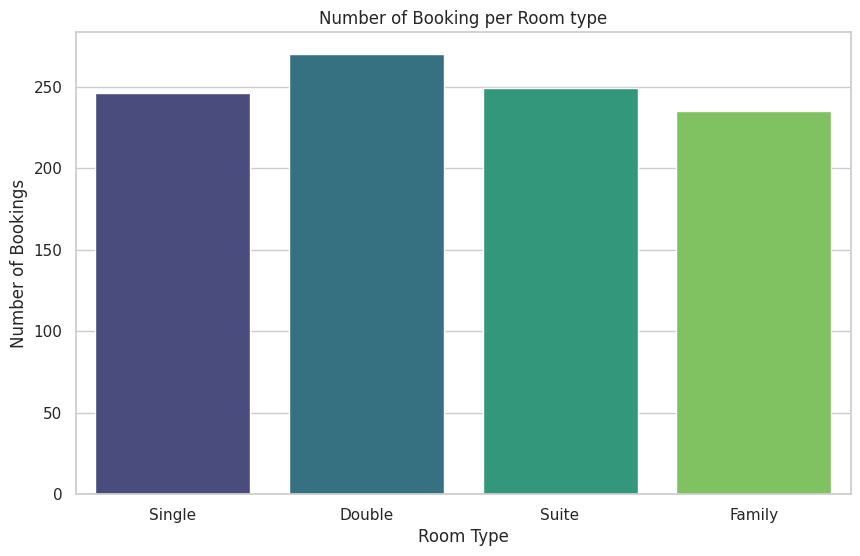

/tmp/ipykernel_126856/2840563021.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Booking Status', order=statuses, palette='viridis')


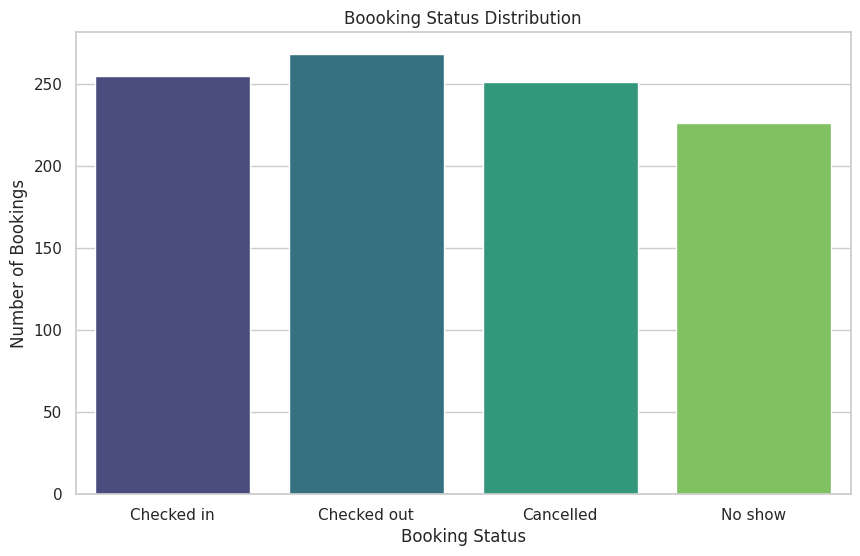

/tmp/ipykernel_126856/2840563021.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=revenue_per_month, x='Month', y='Total Amount', marker='o', palette='viridis')


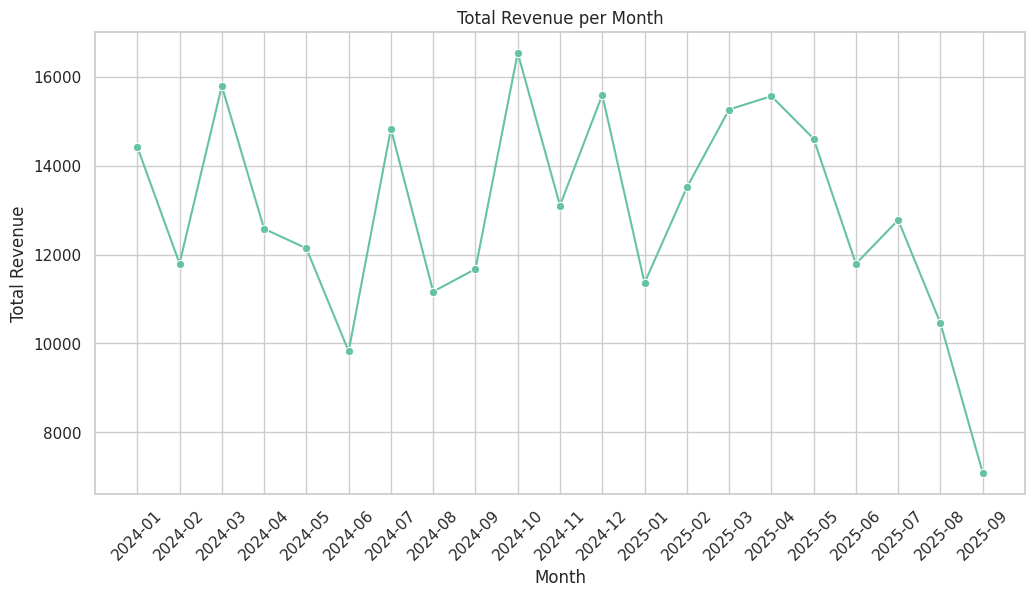

In [13]:
# Plot settings
sns.set(style='whitegrid', palette='Set2')
plt.rcParams.update({'font.size': 12})

# 1. Number of booking per room type
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Room Type', order=room_type, palette='viridis')
plt.title('Number of Booking per Room type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.show()

# 2. Booking status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Booking Status', order=statuses, palette='viridis')
plt.title('Boooking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.show()

# 3. Total Revenue per month
new_df['Month'] = new_df['Check-in Date'].dt.to_period('M').astype(str)
revenue_per_month = new_df.groupby('Month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_per_month, x='Month', y='Total Amount', marker='o', palette='viridis')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


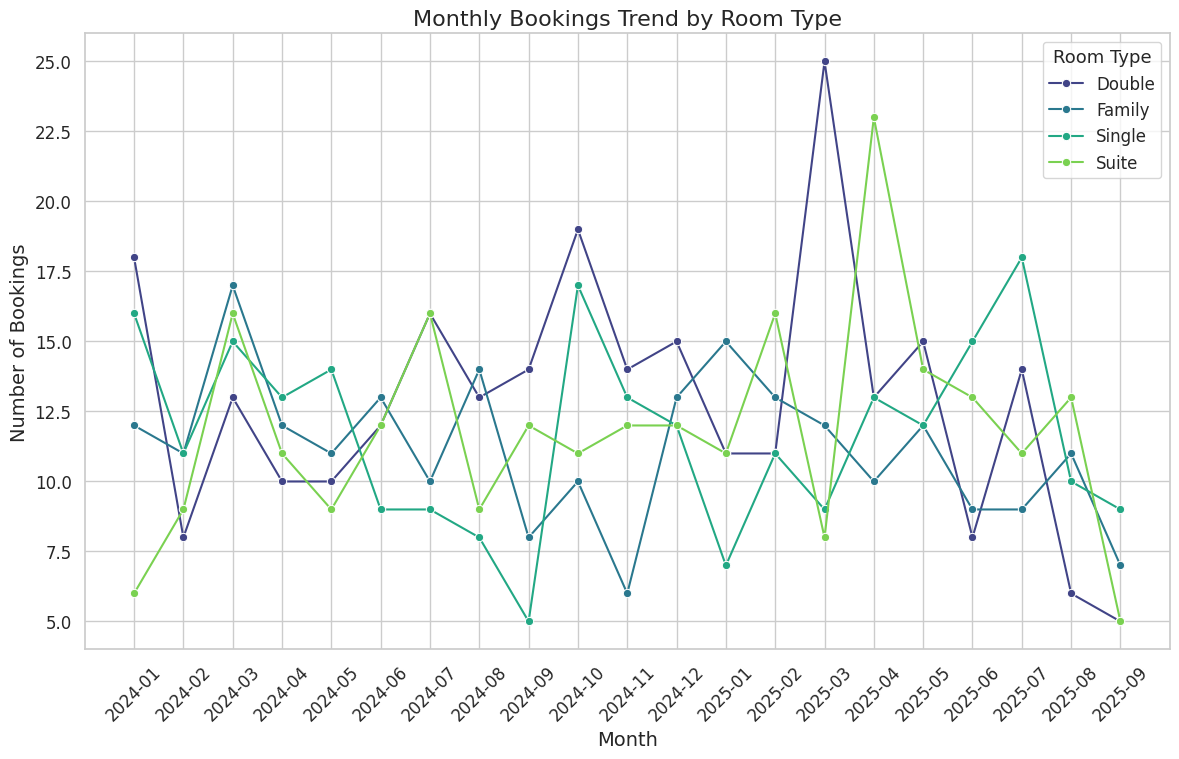

In [14]:
monthly_bookings = new_df.groupby(['Month', 'Room Type']).size().reset_index(name='Bookings')
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_bookings, x='Month', y='Bookings', hue='Room Type',marker='o', palette='viridis')
plt.title('Monthly Bookings Trend by Room Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Room Type', title_fontsize='13', fontsize='12')
plt.grid(True)
plt.show()

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
# Set seed for reproducibility
np.random.seed(150)
random.seed(150)
# Constants
num_records = 1000
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
room_types = ['Single', 'Double', 'Suite', 'Family']
statuses = ['Checked In', 'Checked Out', 'Cancelled', 'No Show']

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Generate data
data = {
    'Booking ID': range(1, num_records + 1),
    'Check-in Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Customer ID': [random.randint(1000, 9999) for _ in range(num_records)],
    'Room Type': [random.choice(room_types) for _ in range(num_records)],
    'Booking Status': [random.choice(statuses) for _ in range(num_records)],
    'Total Amount': [round(random.uniform(50, 500), 2) for _ in range(num_records)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate check-out date based on check-in date and random stay duration
df['Check-out Date'] = df['Check-in Date'] + pd.to_timedelta(np.random.randint(1, 15, size=num_records), unit='D')

# Display the first few rows of the DataFrame
df.head()

,Booking ID,Check-in Date,Customer ID,Room Type,Booking Status,Total Amount,Check-out Date
0,1,2023-06-17,6795,Single,Cancelled,146.70,2023-06-22
1,2,2023-07-24,2699,Family,Checked Out,134.89,2023-08-04
2,3,2023-04-07,3756,Double,Cancelled,373.96,2023-04-19
3,4,2023-04-27,6399,Family,Checked Out,391.31,2023-05-07
4,5,2023-06-05,9130,Single,Cancelled,279.45,2023-06-06


In [16]:
# Step 1: Handling missing values
# Assuming we want to drop rows with any missing values
df_cleaned = df.dropna()

# Step 2: Handling duplicates
# Drop any duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Step 3: Correcting data types
# Convert 'Check-in Date' and 'Check-out Date' to datetime if not already in datetime format
df_cleaned['Check-in Date'] = pd.to_datetime(df_cleaned['Check-in Date'])
df_cleaned['Check-out Date'] = pd.to_datetime(df_cleaned['Check-out Date'])

# Display cleaned data
df_cleaned.head()

,Booking ID,Check-in Date,Customer ID,Room Type,Booking Status,Total Amount,Check-out Date
0,1,2023-06-17,6795,Single,Cancelled,146.70,2023-06-22
1,2,2023-07-24,2699,Family,Checked Out,134.89,2023-08-04
2,3,2023-04-07,3756,Double,Cancelled,373.96,2023-04-19
3,4,2023-04-27,6399,Family,Checked Out,391.31,2023-05-07
4,5,2023-06-05,9130,Single,Cancelled,279.45,2023-06-06


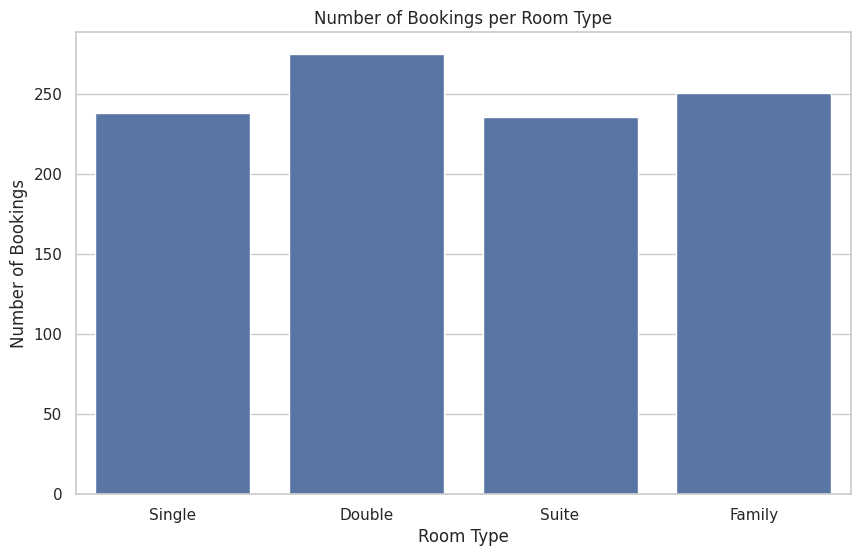

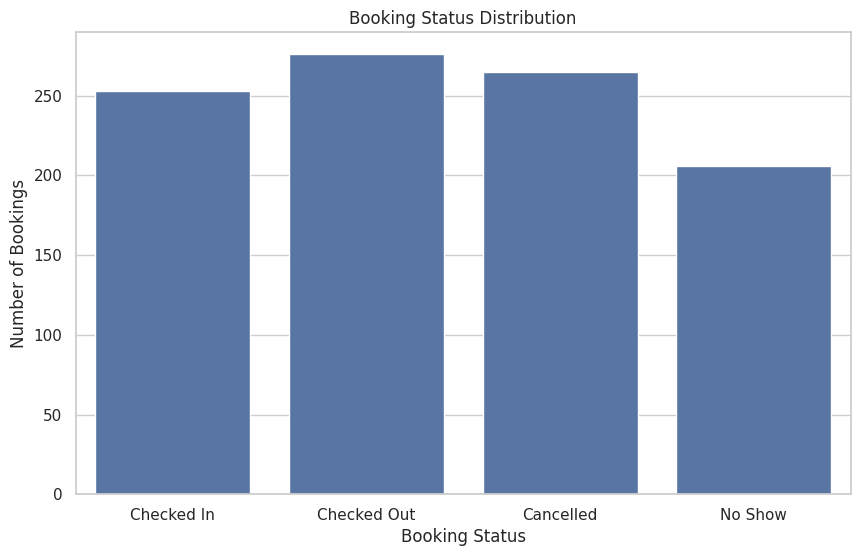

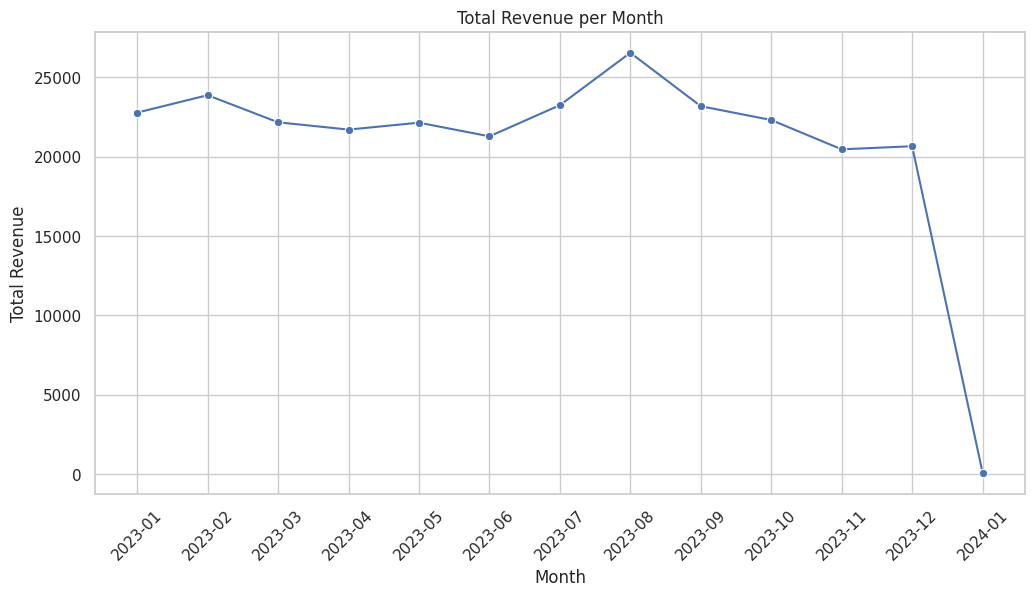

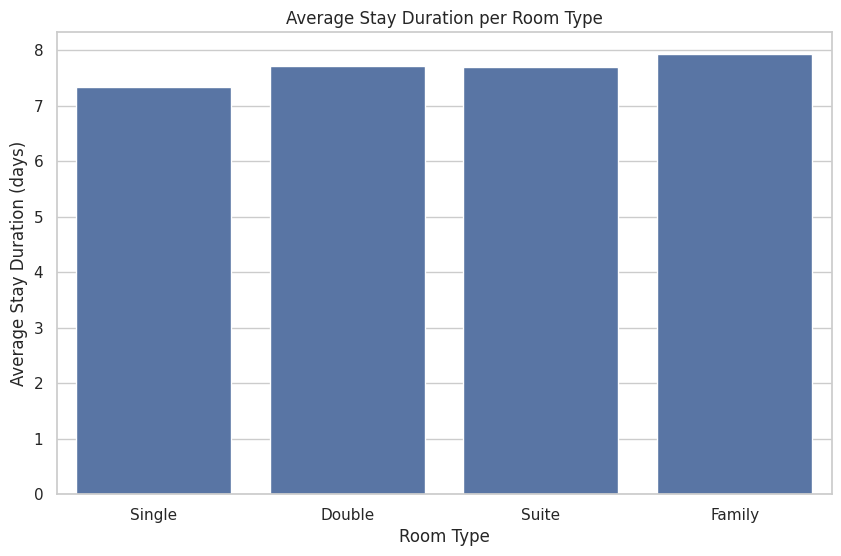

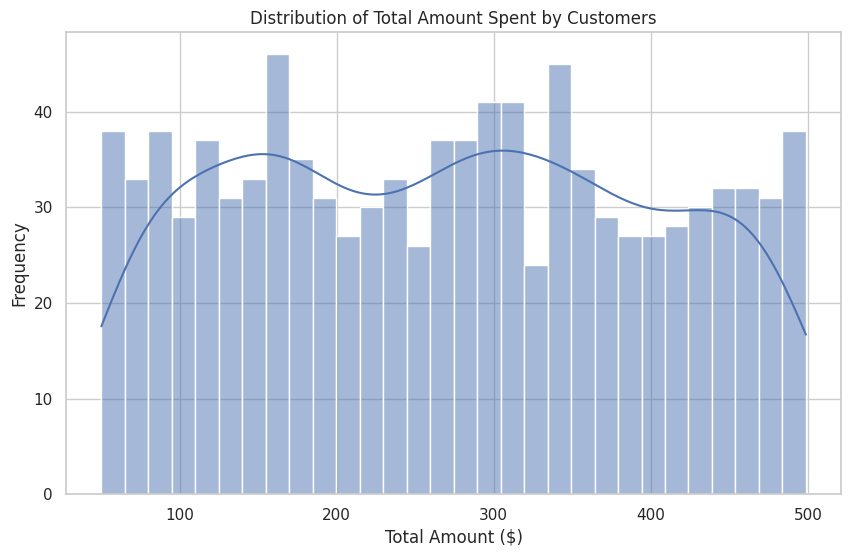

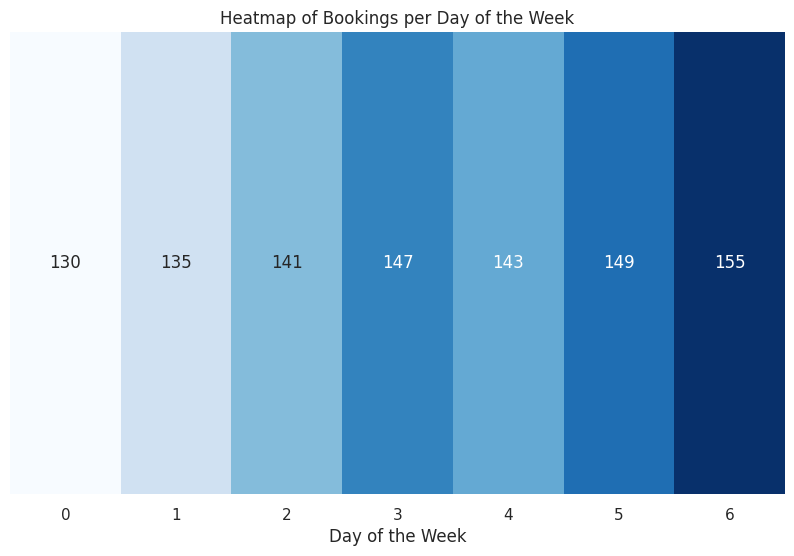

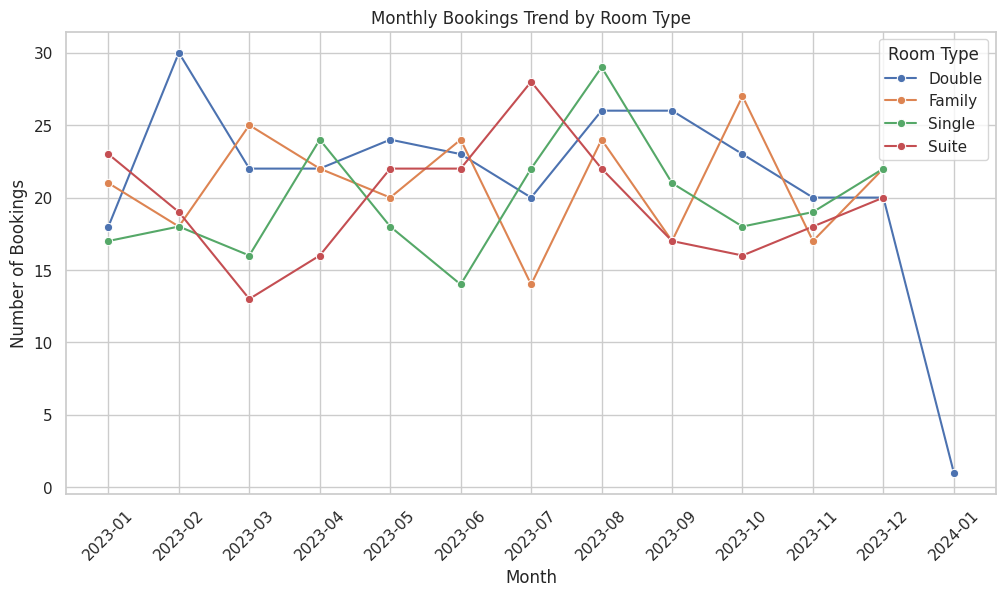

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style='whitegrid')

# 1. Number of bookings per room type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Room Type', order=room_types)
plt.title('Number of Bookings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.show()

# 2. Booking status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Booking Status', order=statuses)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Number of Bookings')
plt.show()


# 3. Total revenue per month
df_cleaned['Month'] = df_cleaned['Check-in Date'].dt.to_period('M').astype(str)
revenue_per_month = df_cleaned.groupby('Month')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_per_month, x='Month', y='Total Amount', marker='o')
plt.title('Total Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


# 4. Average stay duration per room type
df_cleaned['Stay Duration'] = (df_cleaned['Check-out Date'] - df_cleaned['Check-in Date']).dt.days
avg_stay_duration = df_cleaned.groupby('Room Type')['Stay Duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_stay_duration, x='Room Type', y='Stay Duration',order=room_types)
plt.title('Average Stay Duration per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Stay Duration (days)')
plt.show()


# 5. Distribution of total amount spent by customers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Total Amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount Spent by Customers')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()


# 6. Heatmap of bookings per day of the week
df_cleaned['Day of Week'] = df_cleaned['Check-in Date'].dt.day_name()
day_of_week_count = df_cleaned['Day of Week'].value_counts().reindex(
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
)
plt.figure(figsize=(10, 6))
sns.heatmap(day_of_week_count.values.reshape(1, -1), annot=True, fmt='d',cmap='Blues', cbar=False)
plt.title('Heatmap of Bookings per Day of the Week')
plt.xlabel('Day of the Week')
plt.yticks([])
plt.show()


# 7. Monthly bookings trend by room type
monthly_bookings = df_cleaned.groupby(['Month', 'Room Type']).size().reset_index(name='Bookings')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='Month', y='Bookings', hue='Room Type',marker='o')
plt.title('Monthly Bookings Trend by Room Type')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random


# Set seed for reproducibility
np.random.seed(150)
random.seed(150)


# Constants
num_records = 1000
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
room_types = ['Single', 'Double', 'Suite', 'Family']
statuses = ['Checked In', 'Checked Out', 'Cancelled', 'No Show']


# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))


# Generate data
data = {
    'Booking ID': range(1, num_records + 1),
    'Check-in Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Customer ID': [random.randint(1000, 9999) for _ in range(num_records)],
    'Room Type': [random.choice(room_types) for _ in range(num_records)],
    'Booking Status': [random.choice(statuses) for _ in range(num_records)],
    'Total Amount': [round(random.uniform(50, 500), 2) for _ in range(num_records)]
}


# Create DataFrame
df = pd.DataFrame(data)

# Calculate check-out date based on check-in date and random stay duration
df['Check-out Date'] = df['Check-in Date'] + pd.to_timedelta(np.random.randint(1, 15, size=num_records), unit='D')

# Display the first few rows of the DataFrame
df.head()

# Step 1: Handling missing values
# Assuming we want to drop rows with any missing values
df_cleaned = df.dropna()


# Step 2: Handling duplicates
# Drop any duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Step 3: Correcting data types
# Convert 'Check-in Date' and 'Check-out Date' to datetime if not already in datetime format
df_cleaned['Check-in Date'] = pd.to_datetime(df_cleaned['Check-in Date'])
df_cleaned['Check-out Date'] = pd.to_datetime(df_cleaned['Check-out Date'])

# Display cleaned data
df_cleaned.head()



,Booking ID,Check-in Date,Customer ID,Room Type,Booking Status,Total Amount,Check-out Date
0,1,2023-06-17,6795,Single,Cancelled,146.70,2023-06-22
1,2,2023-07-24,2699,Family,Checked Out,134.89,2023-08-04
2,3,2023-04-07,3756,Double,Cancelled,373.96,2023-04-19
3,4,2023-04-27,6399,Family,Checked Out,391.31,2023-05-07
4,5,2023-06-05,9130,Single,Cancelled,279.45,2023-06-06


/tmp/ipykernel_126856/770545952.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Room Type', order=room_types,palette='viridis')


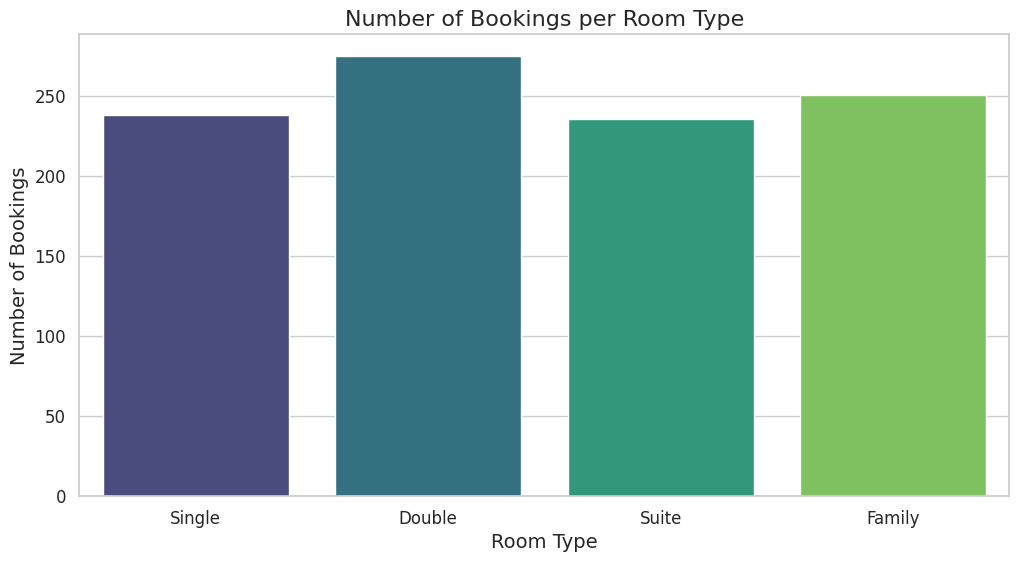

/tmp/ipykernel_126856/770545952.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Booking Status', order=statuses,palette='viridis')


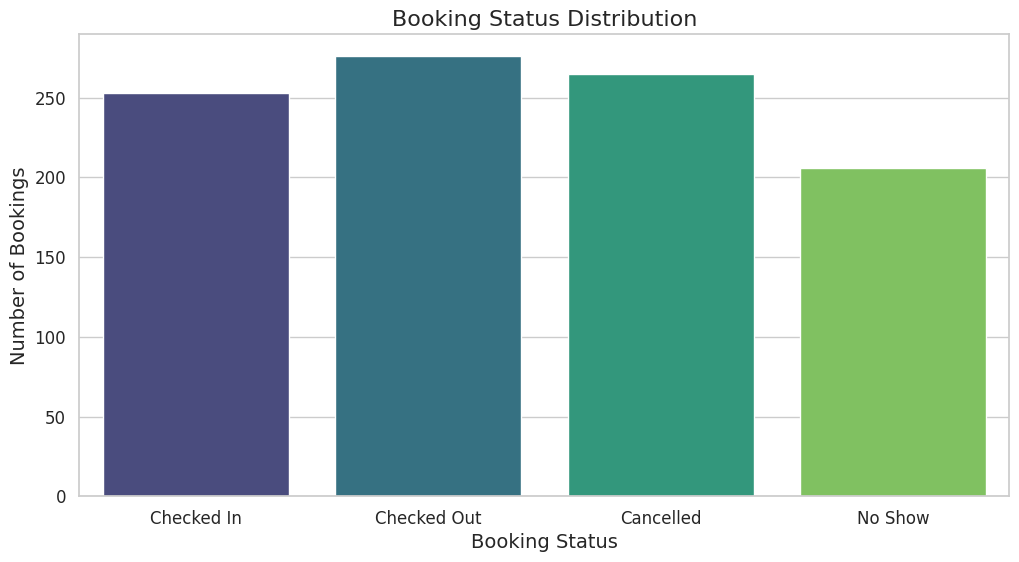

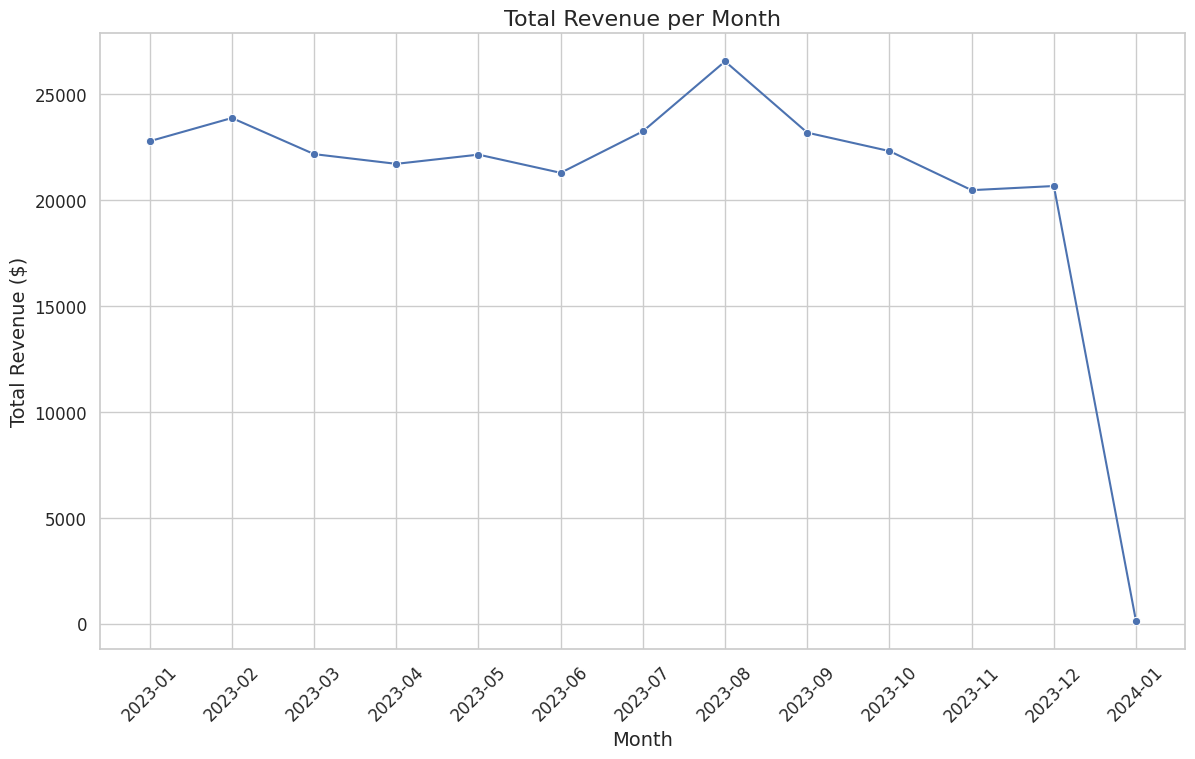

/tmp/ipykernel_126856/770545952.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stay_duration, x='Room Type', y='Stay Duration',order=room_types, palette='viridis')


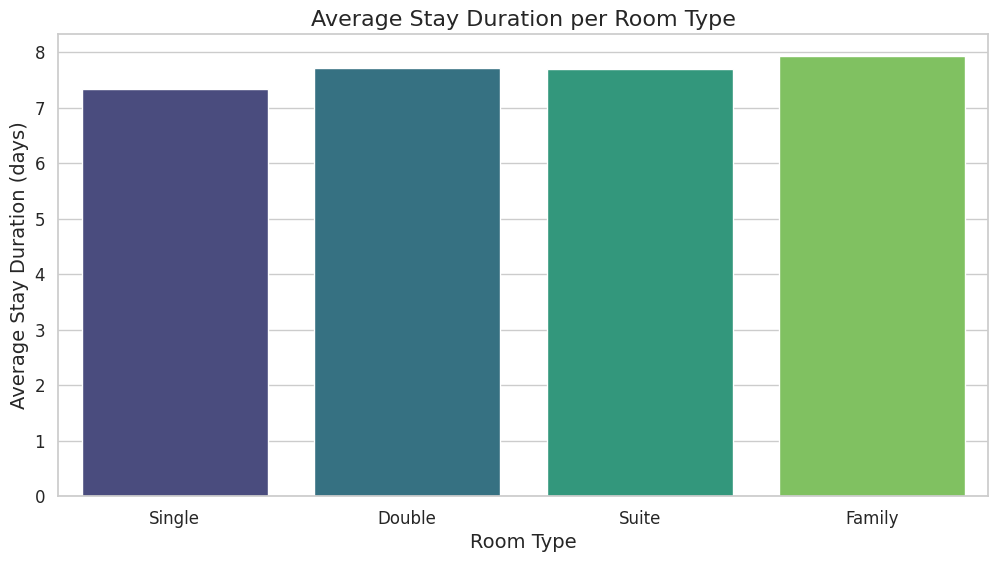

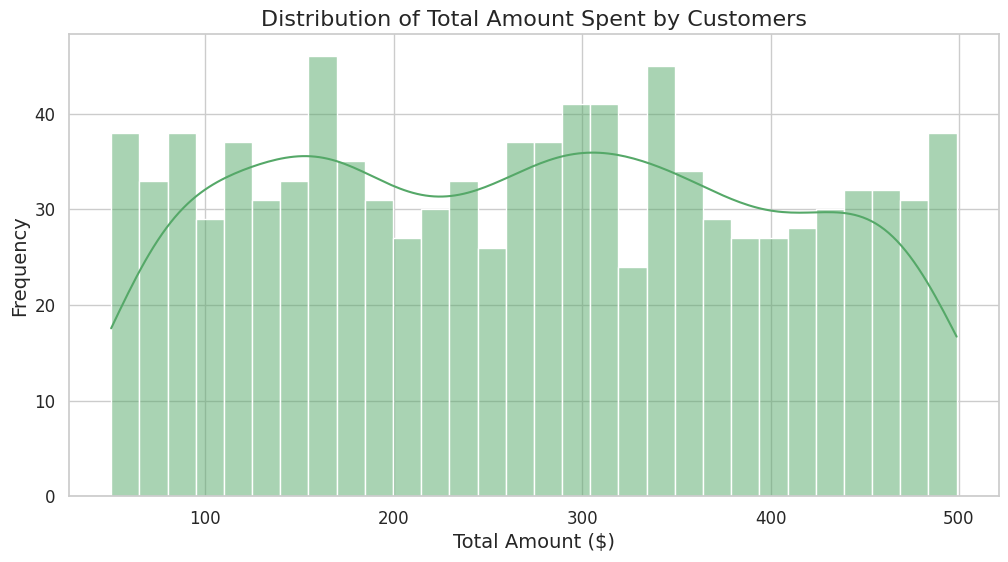

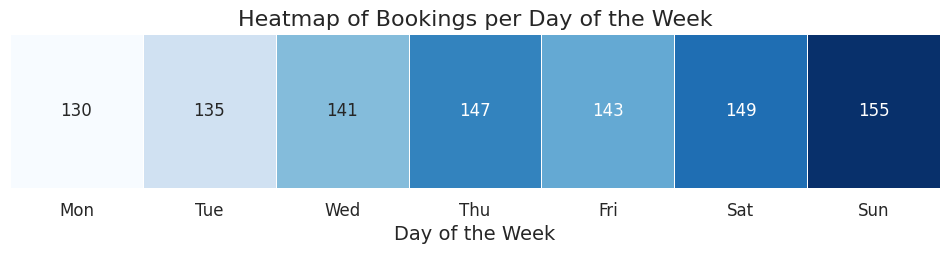

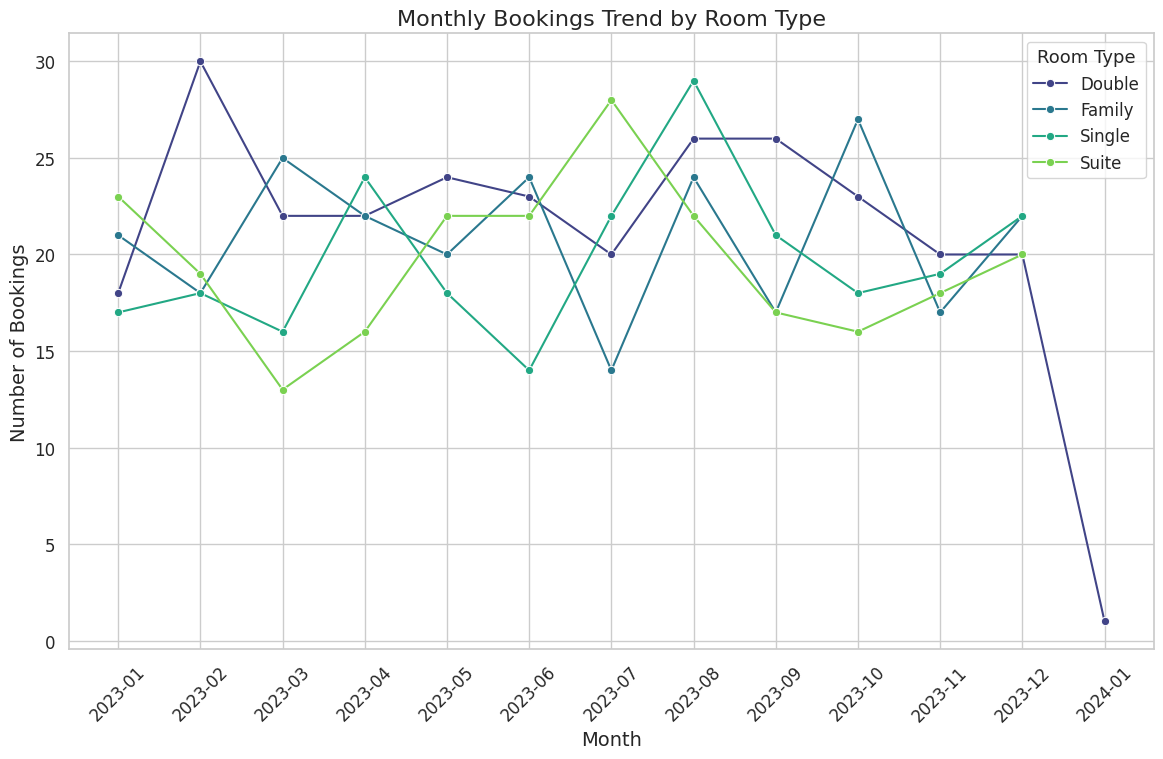

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style='whitegrid', palette='Set2')
plt.rcParams.update({'font.size': 12})

# 1. Number of bookings per room type
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Room Type', order=room_types,palette='viridis')
plt.title('Number of Bookings per Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 2. Booking status distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Booking Status', order=statuses,palette='viridis')
plt.title('Booking Status Distribution', fontsize=16)
plt.xlabel('Booking Status', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 3. Total revenue per month
df_cleaned['Month'] = df_cleaned['Check-in Date'].dt.to_period('M').astype(str)
revenue_per_month = df_cleaned.groupby('Month')['Total Amount'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_per_month, x='Month', y='Total Amount', marker='o',color='b')
plt.title('Total Revenue per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


# 4. Average stay duration per room type
df_cleaned['Stay Duration'] = (df_cleaned['Check-out Date'] - df_cleaned['Check-in Date']).dt.days
avg_stay_duration = df_cleaned.groupby('Room Type')['Stay Duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_stay_duration, x='Room Type', y='Stay Duration',order=room_types, palette='viridis')
plt.title('Average Stay Duration per Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Stay Duration (days)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 5. Distribution of total amount spent by customers
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Total Amount'], bins=30, kde=True, color='g')
plt.title('Distribution of Total Amount Spent by Customers', fontsize=16)
plt.xlabel('Total Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 6. Heatmap of bookings per day of the week
df_cleaned['Day of Week'] = df_cleaned['Check-in Date'].dt.day_name()
day_of_week_count = df_cleaned['Day of Week'].value_counts().reindex(
['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
)
plt.figure(figsize=(12, 2))
sns.heatmap(day_of_week_count.values.reshape(1, -1), annot=True, fmt='d',cmap='Blues', cbar=False, linewidths=.5)
plt.title('Heatmap of Bookings per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.yticks([])
plt.xticks(ticks=np.arange(7)+0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat', 'Sun'], fontsize=12)
plt.show()


# 7. Monthly bookings trend by room type
monthly_bookings = df_cleaned.groupby(['Month', 'Room Type']).size().reset_index(name='Bookings')
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_bookings, x='Month', y='Bookings', hue='Room Type',marker='o', palette='viridis')
plt.title('Monthly Bookings Trend by Room Type', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Room Type', title_fontsize='13', fontsize='12')
plt.grid(True)
plt.show()